In [1]:
#porting Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc,hinge_loss,roc_auc_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

from sklearn import svm 
from sklearn.svm import SVC


In [2]:
df= pd.read_csv('Diabetes.csv')

In [3]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

In [4]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col

In [5]:
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])

In [6]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [7]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [8]:
median_target('insulin')
median_target('glucose_conc')
median_target('skin_len')
median_target('bp')
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [9]:
#Filling the NaN value with Median according to Output
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [10]:
median_target('n_pregnant')
df.loc[(df['Output'] == 0 ) & (df['n_pregnant']>13), 'n_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['n_pregnant']>13), 'n_pregnant'] = 4
median_target('bp')
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

In [11]:
median_target('skin_len')
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32
median_target('bmi')
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3


In [12]:
median_target('pedigree_fun')
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

In [13]:
median_target('age')
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

In [14]:
df.dtypes

n_pregnant        int64
glucose_conc    float64
bp              float64
skin_len        float64
insulin         float64
bmi             float64
pedigree_fun    float64
age               int64
Output            int64
dtype: object

In [15]:
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,0.449,33,1


In [16]:
df['Output'].unique()

array([1, 0], dtype=int64)

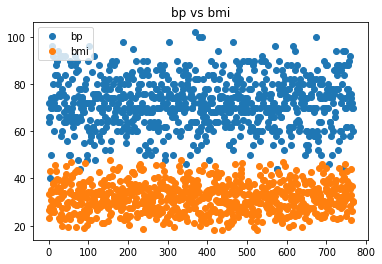

In [17]:
#data visulation
plt.plot(df['bp'],'o')
plt.plot(df['bmi'],'o')
plt.title('bp vs bmi')
plt.legend(['bp','bmi'], loc='upper left')
plt.show()
#BLUE FOR BP
#ORANGE FOR BMI

In [18]:
scaler = MinMaxScaler()
df.col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df[df.col]= scaler.fit_transform(df[df.col])

<ipython-input-18-2355deec75c5>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']


In [19]:
df

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,0.461538,0.670968,0.516129,0.833333,0.186899,0.518519,0.597388,0.725,1.0
1,0.076923,0.264516,0.419355,0.500000,0.106370,0.282828,0.297062,0.250,0.0
2,0.615385,0.896774,0.387097,0.666667,0.186899,0.171717,0.646355,0.275,1.0
3,0.076923,0.290323,0.419355,0.166667,0.096154,0.333333,0.096844,0.000,0.0
4,0.000000,0.600000,0.000000,0.833333,0.185096,0.838384,0.403700,0.300,1.0
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.367742,0.580645,0.388889,0.199519,0.494949,0.101197,0.150,0.0
764,0.153846,0.503226,0.483871,0.388889,0.106370,0.626263,0.285092,0.150,0.0
765,0.384615,0.496774,0.516129,0.166667,0.117788,0.269360,0.181719,0.225,0.0
766,0.076923,0.529032,0.322581,0.666667,0.186899,0.400673,0.294886,0.650,1.0


In [20]:
#Splitting the Data
X = df.drop(['Output'], 1)
y = df['Output']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train.shape

(614, 8)

In [22]:
X_test.shape

(154, 8)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(8,), activation='relu'),
    keras.layers.Dense(6, input_shape=(8,), activation='relu'),
    keras.layers.Dense(4, input_shape=(8,), activation='relu'),
    keras.layers.Dense(2, input_shape=(8,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),   
])

model.compile (optimizer = "adam",
               loss="binary_crossentropy",
               metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5942 - val_loss: 0.6899 - val_accuracy: 0.6935
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.6341 - val_loss: 0.6868 - val_accuracy: 0.6935
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6341 - val_loss: 0.6834 - val_accuracy: 0.6935
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6341 - val_loss: 0.6797 - val_accuracy: 0.6935
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.6341 - val_loss: 0.6745 - val_accuracy: 0.6935
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6341 - val_loss: 0.6685 - val_accuracy: 0.6935
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6341 - val_loss: 0.6633 - val_accuracy: 0.6935
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8351 - val_loss: 0.4459 - val_accuracy: 0.8226
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8388 - val_loss: 0.4386 - val_accuracy: 0.8387
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8351 - val_loss: 0.4380 - val_accuracy: 0.8548
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8315 - val_loss: 0.4423 - val_accuracy: 0.8548
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8333 - val_loss: 0.4381 - val_accuracy: 0.8387
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8333 - val_loss: 0.4467 - val_accuracy: 0.8226
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8388 - val_loss: 0.4396 - val_accuracy: 0.8387
Epoch 

In [24]:
yp=model.predict(X_test)
yp[:15]

array([[0.66440463],
       [0.11385798],
       [0.03220946],
       [0.66440463],
       [0.12135363],
       [0.01133519],
       [0.66440463],
       [0.66440463],
       [0.50668406],
       [0.66440463],
       [0.66440463],
       [0.66440463],
       [0.66440463],
       [0.0240154 ],
       [0.02120116]], dtype=float32)

In [25]:
y_test[:10]

661    1.0
122    0.0
113    0.0
14     1.0
529    0.0
103    0.0
338    1.0
588    1.0
395    0.0
204    0.0
Name: Output, dtype: float64

In [26]:
y_pred = []
for element in yp:
    if element > .5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
y_pred[:10]

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1]

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       107
         1.0       0.70      0.83      0.76        47

    accuracy                           0.84       154
   macro avg       0.81      0.84      0.82       154
weighted avg       0.85      0.84      0.84       154



Text(69.0, 0.5, 'Truth')

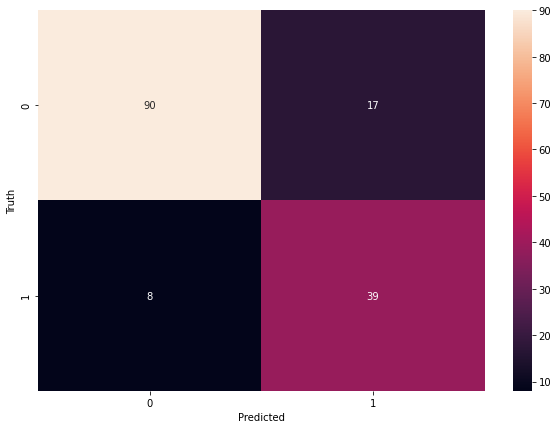

In [30]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
round((93+39)/(93+39+8+14),2)

0.86

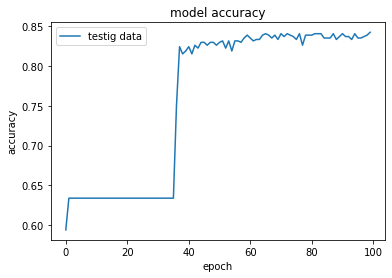

In [32]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['testig data'],loc='upper left')
plt.show()

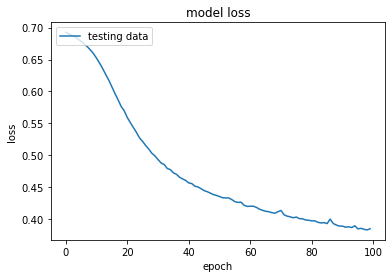

In [33]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['testing data'],loc='upper left')
plt.show()

In [35]:
accuracy_score(y_test, y_pred)

0.8376623376623377

ROC AUC: 0.84


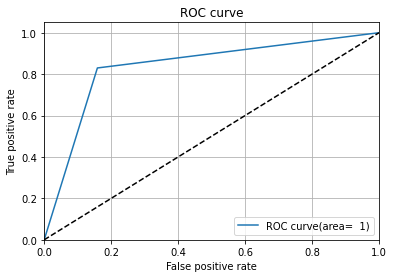

In [36]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()